# Numerical Analysis for ODEs - Tutorial Sheet 3 Q1

Use the trapeziodal and Simpson's rules to approximate the following integral:

$$ I = \int_0^1 \sqrt x \, dx $$

Evaluate the true solution and calculate the error in each case.

Analytical Solution

$$ 
\begin{align*}
I &= \int_0^1 \sqrt x dx \\
  &= \int_0^1 x^{\frac{1}{2}} dx \\
  &= \left[ \frac{2}{3}x^{\frac{3}{2}} \right]^1_0 \\
  &= \frac{2}{3}
\end{align*}
$$


In [6]:
Actual=2/3

## Trapeziodal Rule
$$ I = \int_a^b f(x) \, dx  \approx (b - a).\frac{f(a) + f(b)}{2}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

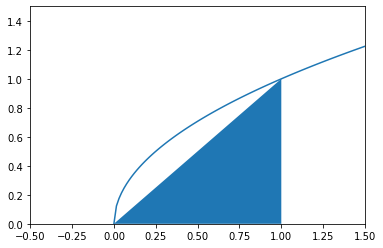

In [3]:
x = np.linspace(0,1.5,100)
y = np.sqrt(x)
plt.plot(x,y)

x0 = 0; x1 = 1;
y0 = np.sqrt(x0); y1 = np.sqrt(x1);
plt.fill_between([x0,x1],[y0,y1])

plt.xlim([-0.5,1.5]); plt.ylim([0,1.5]);
plt.show()

In [22]:
T = 0.5*(y1 + y0)*(x1 - x0)
print("Trapezoid Rule:", T)
TError = abs(T - Actual)
print("Trapeziod Rule Error:", TError)
TPercentageError = TError/Actual*100
print("Trapeziod Rule Percentage Error:", TPercentageError)

Trapezoid Rule: 0.5
Trapeziod Rule Error: 0.16666666666666663
Trapeziod Rule Percentage Error: 24.999999999999993


In [10]:
def trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

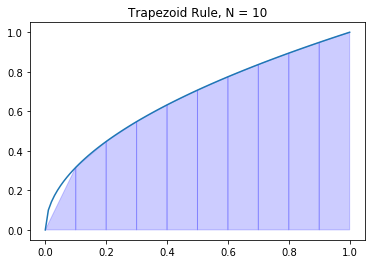

In [12]:
f = lambda x : np.sqrt(x)
a = 0; b = 1; N = 10

# x and y values for the trapezoid rule
x = np.linspace(a,b,N+1)
y = f(x)

# X and Y values for plotting y=f(x)
X = np.linspace(a,b,100)
Y = f(X)
plt.plot(X,Y)

for i in range(N):
    xs = [x[i],x[i],x[i+1],x[i+1]]
    ys = [0,f(x[i]),f(x[i+1]),0]
    plt.fill(xs,ys,'b',edgecolor='b',alpha=0.2)

plt.title('Trapezoid Rule, N = {}'.format(N))
plt.show()

In [15]:
I = trapz(f,a,b,N)
print('Trapezoid Rule with N = {}:'.format(N), I )

Trapezoid Rule with N = 10: 0.6605093417068174


Theorem. Let $T_N(f)$ denote the trapezoid rule.

$$ T_N(f) = \frac{\Delta x}{2} \sum_{i=1}^N (f(x_i) + f(x_{i-1}))$$

where $\Delta x = (b-a)/N$ and $x_i = a + i \Delta x$. The error bound is

$$E_N^T(f) = \left| \ \int_a^b f(x) \ dx - T_N(f) \ \right| \leq \frac{(b-a)^3}{12 N^2} K_2$$

where $\left| \ f''(x) \, \right| \leq K_2$ for all $x \in [a,b]$





## Definition of the Simpson's Rule
Simpson's rule uses a quadratic polynomial on each subinterval of a partition to approximate the function $f(x)$ and to compute the definite integral. This is an improvement over the trapezoid rule which approximates $f(x)$ by a straight line on each subinterval of a partition.

The formula for Simpson's rule is

$$ S_N(f) = \frac{\Delta x}{3} \sum_{i=1}^{N/2} \left( f(x_{2i-2}) + 4 f(x_{2i-1}) + f(x_{2i}) \right)$$

where $N$ is an even number of subintervals of $[a,b]$, $\Delta x = (b - a)/N$, and $x_i = a + i \Delta x$.

In [16]:
def simps(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by Simpson's rule.

    Simpson's rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/3) \sum_{k=1}^{N/2} (f(x_{2i-2} + 4f(x_{2i-1}) + f(x_{2i}))
    where x_i = a + i*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : (even) integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using
        Simpson's rule with N subintervals of equal length.

    Examples
    --------
    >>> simps(lambda x : 3*x**2,0,1,10)
    1.0
    '''
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

In [23]:
S = simps(f, a, b, 2)
print('Simpsons Rule with N = {}:'.format(2), S )
SError = abs(S - Actual)
print("Simpsons Rule Error:", SError)
SPercentageError = SError/Actual*100
print("Simpsons Rule Percentage Error:", SPercentageError)

Simpsons Rule with N = 2: 0.6380711874576983
Simpsons Rule Error: 0.028595479208968322
Simpsons Rule Percentage Error: 4.2893218813452485
